In [1]:
print("Problem2")

Problem2


Symmetry Check: Q == Q.T → True
Minimum Eigenvalue of Q: 1.0000228253489263
Positive Definite Check: All eigenvalues > 0 → True
The matrix Q is symmetric and positive definite. The function is strictly convex.
Polishing not needed - no active set detected at optimal point

CVXPY Optimal Cost: -12.607350029315255
CVXPY Optimal Solution (first 5 elements): [ 0.03028523 -0.00022418 -0.00196811  0.01649736  0.12050534]

Gradient Descent Final Cost: -4.5112896071335316
Gradient Descent Final Solution (first 5): [ 0.01740362  0.0098102   0.01062809 -0.00061433 -0.00669105]
Steepest Descent Final Cost: -8.87552484980839
Steepest Descent Final Solution (first 5): [ 0.03291695  0.01263043  0.01381351 -0.00323985  0.02370498]
Nesterov Final Cost: -12.53258180888985
Nesterov Final Solution (first 5): [ 2.64184037e-02  8.64059346e-05 -6.26020372e-03  2.29007155e-02
  1.31406037e-01]


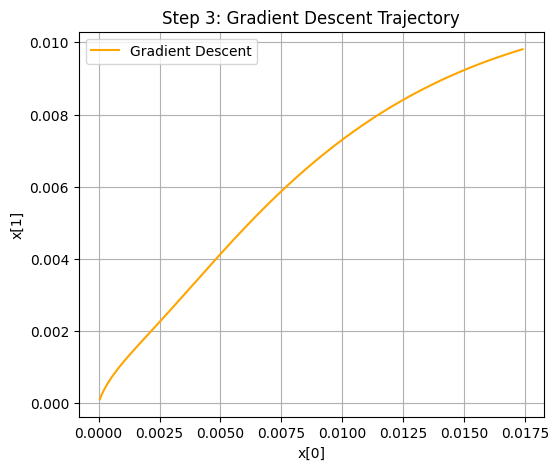

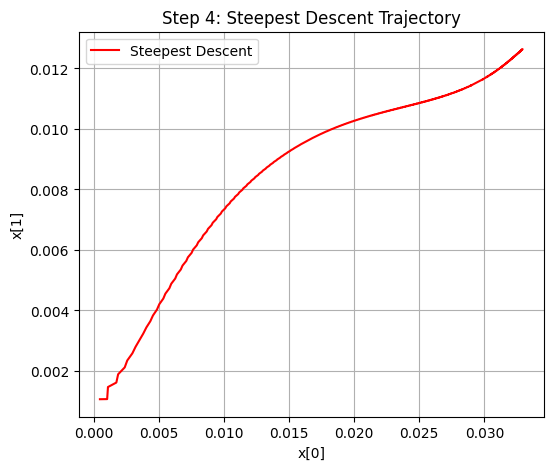

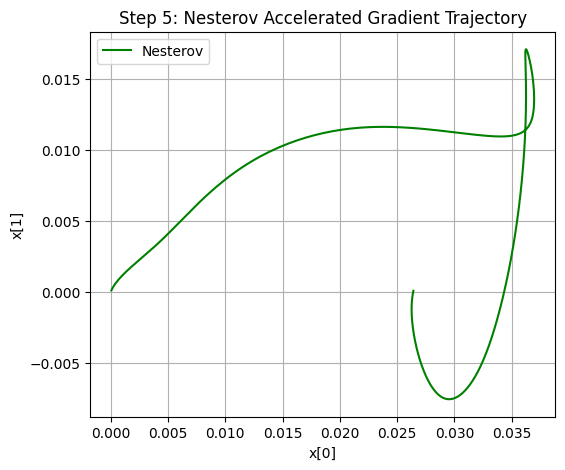

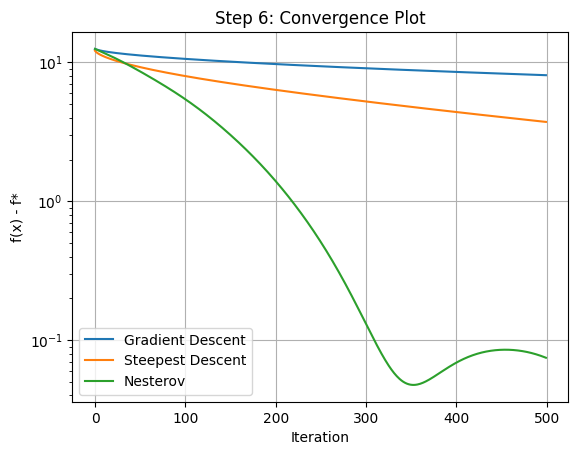

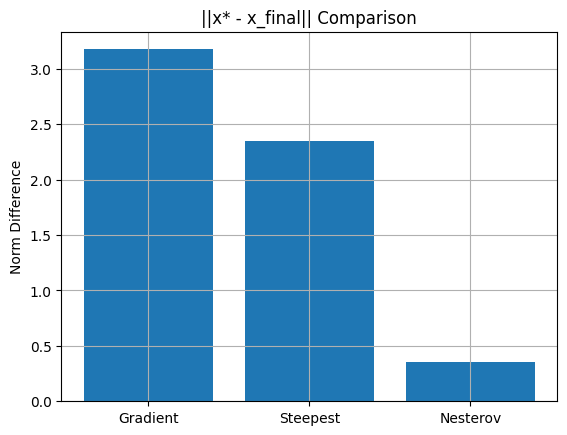

In [2]:
# Import necessary libraries
import numpy as np  # For matrix and vector operations
import matplotlib.pyplot as plt  # For plotting results
import cvxpy as cp  # For solving convex optimization problems

# Set random seed for reproducibility
np.random.seed(0)  # Ensures consistent results across runs

# Define problem dimensions and parameters
n = 1000  # Dimension of the problem
rho = 1.0  # Regularization parameter to ensure positive definiteness
A = np.random.randn(n, n)  # Generate random matrix A from standard normal distribution
Q = A @ A.T + rho * np.eye(n)  # Create symmetric positive definite matrix Q
b = np.random.randn(n, 1)  # Generate random vector b

# Define the objective function f(x)
def f(x):
    return 0.5 * x.T @ Q @ x - b.T @ x  # Quadratic form: 1/2 x^T Q x - b^T x

# Define the gradient of the objective function
def grad_f(x):
    return Q @ x - b  # Gradient of f(x): Qx - b

# Step 1: Convexity Check with detailed output
is_symmetric = np.allclose(Q, Q.T)  # Check if Q is symmetric
print("Symmetry Check: Q == Q.T →", is_symmetric)  # Print result

eigvals = np.linalg.eigvalsh(Q)  # Compute eigenvalues of symmetric matrix Q
min_eig = np.min(eigvals)  # Find the minimum eigenvalue
print("Minimum Eigenvalue of Q:", min_eig)  # Print the smallest eigenvalue

is_positive_definite = np.all(eigvals > 0)  # Check if all eigenvalues are positive
print("Positive Definite Check: All eigenvalues > 0 →", is_positive_definite)  # Print result

# Final conclusion on convexity
if is_symmetric and is_positive_definite:
    print("The matrix Q is symmetric and positive definite. The function is strictly convex.")
else:
    print("Q does not satisfy convexity conditions.")

# Step 2: Solve the quadratic program using CVXPY
x_cvx = cp.Variable((n, 1))  # Define optimization variable
objective = cp.Minimize(0.5 * cp.quad_form(x_cvx, Q) - b.T @ x_cvx)  # Define objective function
problem = cp.Problem(objective)  # Define the problem
problem.solve()  # Solve the problem
x_star = x_cvx.value  # Extract optimal solution
f_star = f(x_star)  # Evaluate optimal cost

# Print CVXPY results
print("\nCVXPY Optimal Cost:", f_star.item())  # Print optimal function value
print("CVXPY Optimal Solution (first 5 elements):", x_star[:5].flatten())  # Print first 5 elements

# Step 3: Gradient Descent algorithm
def gradient_descent(x0, alpha=1e-4, max_iter=500):
    x = x0.copy()  # Initialize x
    xs, fs = [], []  # Lists to store trajectory and costs
    for _ in range(max_iter):
        x -= alpha * grad_f(x)  # Gradient descent update
        xs.append(x.copy())  # Store current point
        fs.append(f(x).item())  # Store current function value
    return np.array(xs), np.array(fs)  # Return all iterations

# Step 4: Steepest Descent algorithm
def steepest_descent(x0, max_iter=500):
    x = x0.copy()  # Initialize x
    xs, fs = [], []  # Lists to store trajectory and costs
    for _ in range(max_iter):
        g = grad_f(x)  # Compute gradient
        alpha = (g.T @ g) / (g.T @ Q @ g)  # Compute optimal step size
        x -= alpha * g  # Update x using optimal step size
        xs.append(x.copy())  # Store current point
        fs.append(f(x).item())  # Store current function value
    return np.array(xs), np.array(fs)  # Return all iterations

# Step 5: Nesterov Accelerated Gradient algorithm
def nesterov_accelerated(x0, alpha=1e-4, max_iter=500):
    x = y = x0.copy()  # Initialize both x and y
    xs, fs = [], []  # Lists to store trajectory and costs
    t = 1  # Initialize momentum parameter
    for _ in range(max_iter):
        x_old = x.copy()  # Save previous x
        x = y - alpha * grad_f(y)  # Gradient update with lookahead
        t_next = (1 + np.sqrt(1 + 4 * t ** 2)) / 2  # Update momentum scalar
        y = x + ((t - 1) / t_next) * (x - x_old)  # Update y using Nesterov formula
        t = t_next  # Update t
        xs.append(x.copy())  # Store current point
        fs.append(f(x).item())  # Store current function value
    return np.array(xs), np.array(fs)  # Return all iterations

# Initialize starting point
x0 = np.zeros((n, 1))  # Start from zero vector

# Run all algorithms
x_gd, f_gd = gradient_descent(x0)  # Run Gradient Descent
x_sd, f_sd = steepest_descent(x0)  # Run Steepest Descent
x_nag, f_nag = nesterov_accelerated(x0)  # Run Nesterov

# Print final results of all methods
print("\nGradient Descent Final Cost:", f_gd[-1])
print("Gradient Descent Final Solution (first 5):", x_gd[-1][:5].flatten())

print("Steepest Descent Final Cost:", f_sd[-1])
print("Steepest Descent Final Solution (first 5):", x_sd[-1][:5].flatten())

print("Nesterov Final Cost:", f_nag[-1])
print("Nesterov Final Solution (first 5):", x_nag[-1][:5].flatten())

# Step 3 Plot: Gradient Descent Trajectory
plt.figure(figsize=(6, 5))  # Create figure
plt.plot(x_gd[:, 0], x_gd[:, 1], label='Gradient Descent', color='orange')  # Plot trajectory
plt.title('Step 3: Gradient Descent Trajectory')  # Set title
plt.xlabel('x[0]')  # X-axis label
plt.ylabel('x[1]')  # Y-axis label
plt.grid(True)  # Show grid
plt.legend()  # Show legend
plt.show()  # Display plot

# Step 4 Plot: Steepest Descent Trajectory
plt.figure(figsize=(6, 5))  # Create figure
plt.plot(x_sd[:, 0], x_sd[:, 1], label='Steepest Descent', color='red')  # Plot trajectory
plt.title('Step 4: Steepest Descent Trajectory')  # Set title
plt.xlabel('x[0]')  # X-axis label
plt.ylabel('x[1]')  # Y-axis label
plt.grid(True)  # Show grid
plt.legend()  # Show legend
plt.show()  # Display plot

# Step 5 Plot: Nesterov Trajectory
plt.figure(figsize=(6, 5))  # Create figure
plt.plot(x_nag[:, 0], x_nag[:, 1], label='Nesterov', color='green')  # Plot trajectory
plt.title('Step 5: Nesterov Accelerated Gradient Trajectory')  # Set title
plt.xlabel('x[0]')  # X-axis label
plt.ylabel('x[1]')  # Y-axis label
plt.grid(True)  # Show grid
plt.legend()  # Show legend
plt.show()  # Display plot

# Step 6 Plot: f(x) - f*
iters = np.arange(len(f_gd))  # Generate iteration indices
plt.plot(iters, f_gd - f_star.item(), label='Gradient Descent')  # Plot GD error
plt.plot(iters, f_sd - f_star.item(), label='Steepest Descent')  # Plot SD error
plt.plot(iters, f_nag - f_star.item(), label='Nesterov')  # Plot NAG error
plt.yscale('log')  # Log scale for better visibility
plt.xlabel('Iteration')  # X-axis label
plt.ylabel('f(x) - f*')  # Y-axis label
plt.title('Step 6: Convergence Plot')  # Set title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# Step 6 Plot: Norm Errors ||x* - x_final||
err_gd = np.linalg.norm(x_star - x_gd[-1])  # Error for GD
err_sd = np.linalg.norm(x_star - x_sd[-1])  # Error for SD
err_nag = np.linalg.norm(x_star - x_nag[-1])  # Error for NAG

plt.bar(['Gradient', 'Steepest', 'Nesterov'], [err_gd, err_sd, err_nag])  # Bar plot of errors
plt.title('||x* - x_final|| Comparison')  # Set title
plt.ylabel('Norm Difference')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display plot

Symmetry Check: Q == Q.T → True
Minimum Eigenvalue of Q: 1.0000228253489263
Positive Definite Check: All eigenvalues > 0 → True
The matrix Q is symmetric and positive definite. The function is strictly convex.
Polishing not needed - no active set detected at optimal point

CVXPY Optimal Cost: -12.607350029315255
CVXPY Optimal Solution (first 5 elements): [ 0.03028523 -0.00022418 -0.00196811  0.01649736  0.12050534]

Gradient Descent Final Cost: -4.5112896071335316
Gradient Descent Final Solution (first 5): [ 0.01740362  0.0098102   0.01062809 -0.00061433 -0.00669105]
Steepest Descent Final Cost: -8.87552484980839
Steepest Descent Final Solution (first 5): [ 0.03291695  0.01263043  0.01381351 -0.00323985  0.02370498]
Nesterov Final Cost: -12.53258180888985
Nesterov Final Solution (first 5): [ 2.64184037e-02  8.64059346e-05 -6.26020372e-03  2.29007155e-02
  1.31406037e-01]


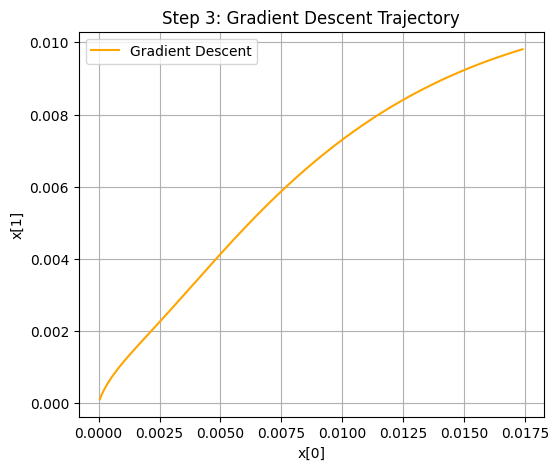

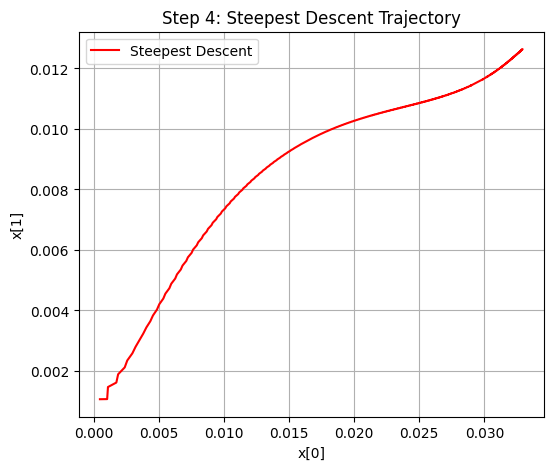

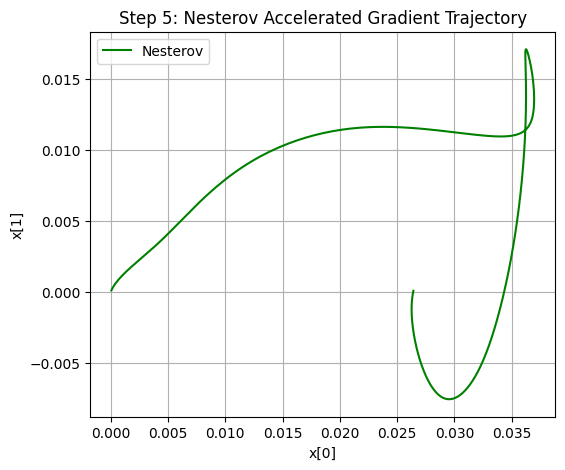

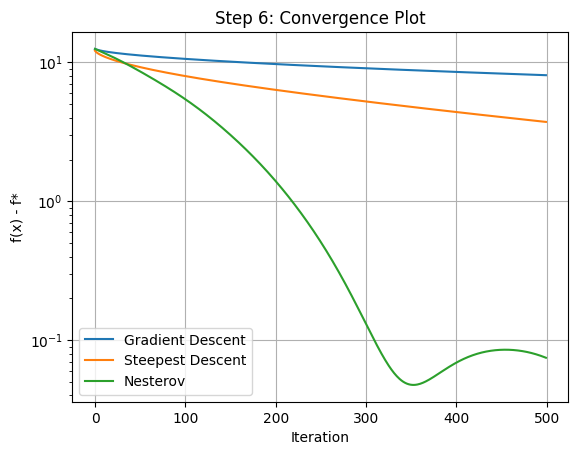

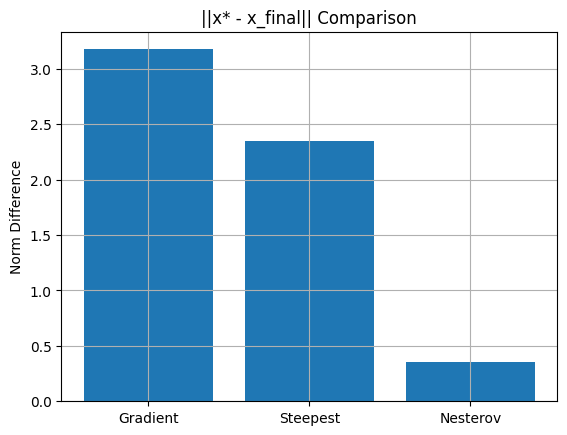

In [4]:
# Import necessary libraries
import numpy as np  # For matrix and vector operations
import matplotlib.pyplot as plt  # For plotting results
import cvxpy as cp  # For solving convex optimization problems

# Set random seed for reproducibility
np.random.seed(0)  # Ensures consistent results across runs

# Define problem dimensions and parameters
n = 1000  # Dimension of the problem
rho = 1.0  # Regularization parameter to ensure positive definiteness
A = np.random.randn(n, n)  # Generate random matrix A from standard normal distribution
Q = A @ A.T + rho * np.eye(n)  # Create symmetric positive definite matrix Q
b = np.random.randn(n, 1)  # Generate random vector b

# Define the objective function f(x)
def f(x):
    return 0.5 * x.T @ Q @ x - b.T @ x  # Quadratic form: 1/2 x^T Q x - b^T x

# Define the gradient of the objective function
def grad_f(x):
    return Q @ x - b  # Gradient of f(x): Qx - b

# Step 1: Convexity Check with detailed output
is_symmetric = np.allclose(Q, Q.T)  # Check symmetry
print("Symmetry Check: Q == Q.T →", is_symmetric)  # Print result

eigvals = np.linalg.eigvalsh(Q)  # Efficient eigenvalue computation for symmetric matrix
min_eig = np.min(eigvals)  # Smallest eigenvalue
print("Minimum Eigenvalue of Q:", min_eig)  # Print min eigenvalue

is_positive_definite = np.all(eigvals > 0)  # Check if Q is positive definite
print("Positive Definite Check: All eigenvalues > 0 →", is_positive_definite)  # Print result

if is_symmetric and is_positive_definite:
    print("The matrix Q is symmetric and positive definite. The function is strictly convex.")
else:
    print("Q does not satisfy convexity conditions.")

# Step 2: Solve the quadratic program using CVXPY
x_cvx = cp.Variable((n, 1))  # Define CVXPY variable
objective = cp.Minimize(0.5 * cp.quad_form(x_cvx, Q) - b.T @ x_cvx)  # Define objective function
problem = cp.Problem(objective)  # Define the optimization problem
problem.solve()  # Solve the problem
x_star = x_cvx.value  # Optimal solution
f_star = f(x_star)  # Optimal cost

# Print CVXPY results
print("\nCVXPY Optimal Cost:", f_star.item())  # Optimal cost
print("CVXPY Optimal Solution (first 5 elements):", x_star[:5].flatten())  # First 5 values

# Step 3: Gradient Descent algorithm
def gradient_descent(x0, alpha=1e-4, max_iter=500):
    x = x0.copy()
    xs, fs = [], []
    for _ in range(max_iter):
        x -= alpha * grad_f(x)
        xs.append(x.copy())
        fs.append(f(x).item())
    return np.array(xs), np.array(fs)

# Step 4: Steepest Descent algorithm
def steepest_descent(x0, max_iter=500):
    x = x0.copy()
    xs, fs = [], []
    for _ in range(max_iter):
        g = grad_f(x)
        alpha = (g.T @ g) / (g.T @ Q @ g)
        x -= alpha * g
        xs.append(x.copy())
        fs.append(f(x).item())
    return np.array(xs), np.array(fs)

# Step 5: Nesterov Accelerated Gradient algorithm
def nesterov_accelerated(x0, alpha=1e-4, max_iter=500):
    x = y = x0.copy()
    xs, fs = [], []
    t = 1
    for _ in range(max_iter):
        x_old = x.copy()
        x = y - alpha * grad_f(y)
        t_next = (1 + np.sqrt(1 + 4 * t ** 2)) / 2
        y = x + ((t - 1) / t_next) * (x - x_old)
        t = t_next
        xs.append(x.copy())
        fs.append(f(x).item())
    return np.array(xs), np.array(fs)

# Initialize starting point
x0 = np.zeros((n, 1))  # Zero initialization

# Run all algorithms
x_gd, f_gd = gradient_descent(x0)
x_sd, f_sd = steepest_descent(x0)
x_nag, f_nag = nesterov_accelerated(x0)

# Print final results
print("\nGradient Descent Final Cost:", f_gd[-1])
print("Gradient Descent Final Solution (first 5):", x_gd[-1][:5].flatten())

print("Steepest Descent Final Cost:", f_sd[-1])
print("Steepest Descent Final Solution (first 5):", x_sd[-1][:5].flatten())

print("Nesterov Final Cost:", f_nag[-1])
print("Nesterov Final Solution (first 5):", x_nag[-1][:5].flatten())

# Step 3 Plot: Gradient Descent Trajectory
plt.figure(figsize=(6, 5))
plt.plot(x_gd[:, 0], x_gd[:, 1], label='Gradient Descent', color='orange')
plt.title('Step 3: Gradient Descent Trajectory')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.grid(True)
plt.legend()
plt.show()

# Step 4 Plot: Steepest Descent Trajectory
plt.figure(figsize=(6, 5))
plt.plot(x_sd[:, 0], x_sd[:, 1], label='Steepest Descent', color='red')
plt.title('Step 4: Steepest Descent Trajectory')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.grid(True)
plt.legend()
plt.show()

# Step 5 Plot: Nesterov Trajectory
plt.figure(figsize=(6, 5))
plt.plot(x_nag[:, 0], x_nag[:, 1], label='Nesterov', color='green')
plt.title('Step 5: Nesterov Accelerated Gradient Trajectory')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.grid(True)
plt.legend()
plt.show()

# Step 6 Plot: f(x) - f*
iters = np.arange(len(f_gd))
plt.plot(iters, f_gd - f_star.item(), label='Gradient Descent')
plt.plot(iters, f_sd - f_star.item(), label='Steepest Descent')
plt.plot(iters, f_nag - f_star.item(), label='Nesterov')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x) - f*')
plt.title('Step 6: Convergence Plot')
plt.legend()
plt.grid(True)
plt.show()

# Step 6 Plot: Norm Errors ||x* - x_final||
err_gd = np.linalg.norm(x_star - x_gd[-1])
err_sd = np.linalg.norm(x_star - x_sd[-1])
err_nag = np.linalg.norm(x_star - x_nag[-1])

plt.bar(['Gradient', 'Steepest', 'Nesterov'], [err_gd, err_sd, err_nag])
plt.title('||x* - x_final|| Comparison')
plt.ylabel('Norm Difference')
plt.grid(True)
plt.show()
